# Central Limit Theorem

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42

In [3]:
df = pd.read_csv('data/adult.csv')

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<AxesSubplot:xlabel='age', ylabel='Density'>

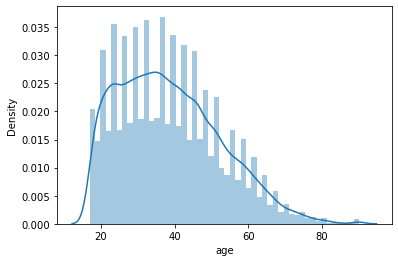

In [7]:
sns.distplot(df['age'])

In [8]:
print('Number of rows: ', df.shape[0])

Number of rows:  48842


In [9]:
samples = random.sample(range(0, df.shape[0]), 50)

In [10]:
df.iloc[samples]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2339,30,Private,203034,Assoc-voc,11,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
6288,45,Private,207955,5th-6th,3,Married-spouse-absent,Other-service,Not-in-family,White,Male,0,0,40,Ecuador,<=50K
24536,32,Private,136480,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
2265,24,Private,130442,Assoc-voc,11,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K
29017,58,Private,119386,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States,<=50K
7835,32,Private,459465,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,El-Salvador,<=50K
10570,21,?,214731,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
28198,30,Private,147921,Assoc-voc,11,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,46,United-States,<=50K
1076,33,Private,231822,10th,6,Separated,Sales,Unmarried,White,Female,0,0,38,United-States,<=50K
18860,47,Private,188330,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,25,United-States,<=50K


In [11]:
# df.iloc[samples, 'age'].mean()

In [12]:
sample_mean = {}
means = []
for i in range(0, 100):
    samples = random.sample(range(0, df.shape[0]), 50)
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_with_50ele'] = means

In [13]:
np.mean(sample_mean['100sam_with_50ele'])

38.6344

<AxesSubplot:ylabel='Density'>

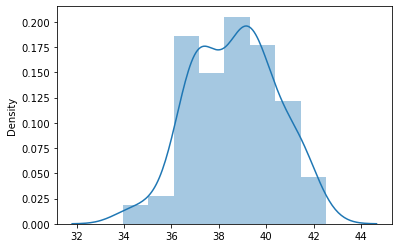

In [14]:
sns.distplot(np.array(sample_mean['100sam_with_50ele']))

In [15]:
means = []
for i in range(0, 100):
    samples = random.sample(range(0, df.shape[0]), 100)
    means.append(df.iloc[samples, 0].mean())

sample_mean['100sam_with_100ele'] = means

In [16]:
np.mean(sample_mean['100sam_with_100ele'])

38.5299

<AxesSubplot:ylabel='Density'>

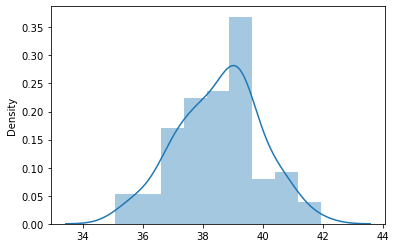

In [17]:
sns.distplot(np.array(sample_mean['100sam_with_100ele']))

In [18]:
def fun(n_sample, m_element):
    means = []
    for i in range(0, n_sample):
        samples = random.sample(range(0, df.shape[0]), m_element)
        means.append(df.iloc[samples, 0].mean())
    return means

In [19]:
sample_mean = {}

sample_mean['100sam_with_50ele'] = fun(100, 50)
sample_mean['1000sam_with_50ele'] = fun(1000, 50)

sample_mean['100sam_with_100ele'] = fun(100, 100)
sample_mean['1000sam_with_100ele'] = fun(1000, 100)

sample_mean['100sam_with_1000ele'] = fun(100, 1000)
sample_mean['1000sam_with_1000ele'] = fun(1000, 1000)


Text(0.5, 1.0, '1000sam_with_1000ele')

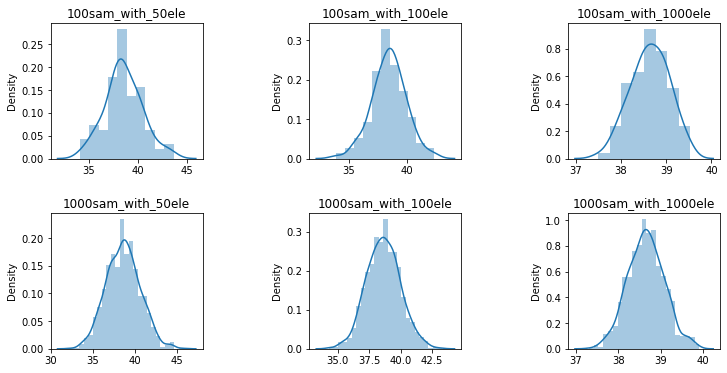

In [24]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
sns.distplot(np.array(sample_mean['100sam_with_50ele']))
plt.title('100sam_with_50ele')

plt.subplot(2, 3, 2)
sns.distplot(np.array(sample_mean['100sam_with_100ele']))
plt.title('100sam_with_100ele')

plt.subplot(2, 3, 3)
sns.distplot(np.array(sample_mean['100sam_with_1000ele']))
plt.title('100sam_with_1000ele')

plt.subplot(2, 3, 4)
sns.distplot(np.array(sample_mean['1000sam_with_50ele']))
plt.title('1000sam_with_50ele')

plt.subplot(2, 3, 5)
sns.distplot(np.array(sample_mean['1000sam_with_100ele']))
plt.title('1000sam_with_100ele')

plt.subplot(2, 3, 6)
sns.distplot(np.array(sample_mean['1000sam_with_1000ele']))
plt.title('1000sam_with_1000ele')

In [21]:
for i, key in enumerate(sample_mean.keys()):
    print(key, np.mean(sample_mean[key]))


100sam_with_50ele 38.53939999999999
1000sam_with_50ele 38.62232000000001
100sam_with_100ele 38.446600000000004
1000sam_with_100ele 38.637800000000006
100sam_with_1000ele 38.639520000000005
1000sam_with_1000ele 38.657488


In [23]:
print('Actual Mean: ', df.iloc[:,0].mean())

Actual Mean:  38.64358543876172


In [26]:
def fun_std(n_sample, m_element):
    std = []
    for i in range(0, n_sample):
        samples = random.sample(range(0, df.shape[0]), m_element)
        means.append(df.iloc[samples, 0].std())
    return std

In [27]:
sample_std = {}

sample_std['100sam_with_50ele'] = fun(100, 50)
sample_std['1000sam_with_50ele'] = fun(1000, 50)

sample_std['100sam_with_100ele'] = fun(100, 100)
sample_std['1000sam_with_100ele'] = fun(1000, 100)

sample_std['100sam_with_1000ele'] = fun(100, 1000)
sample_std['1000sam_with_1000ele'] = fun(1000, 1000)

Text(0.5, 1.0, '1000sam_with_1000ele')

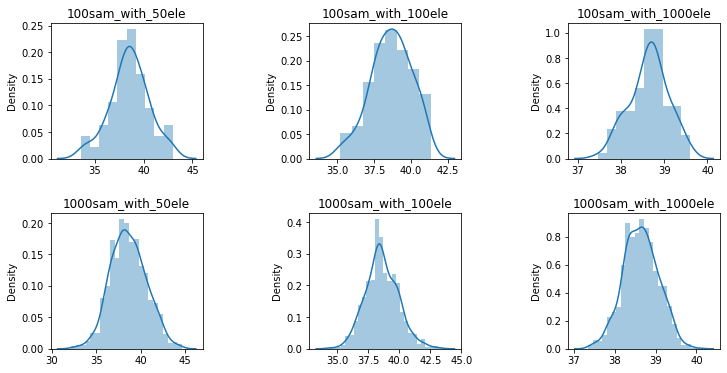

In [28]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(2, 3, 1)
sns.distplot(np.array(sample_std['100sam_with_50ele']))
plt.title('100sam_with_50ele')

plt.subplot(2, 3, 2)
sns.distplot(np.array(sample_std['100sam_with_100ele']))
plt.title('100sam_with_100ele')

plt.subplot(2, 3, 3)
sns.distplot(np.array(sample_std['100sam_with_1000ele']))
plt.title('100sam_with_1000ele')

plt.subplot(2, 3, 4)
sns.distplot(np.array(sample_std['1000sam_with_50ele']))
plt.title('1000sam_with_50ele')

plt.subplot(2, 3, 5)
sns.distplot(np.array(sample_std['1000sam_with_100ele']))
plt.title('1000sam_with_100ele')

plt.subplot(2, 3, 6)
sns.distplot(np.array(sample_std['1000sam_with_1000ele']))
plt.title('1000sam_with_1000ele')